In [1]:
import sys
import pandas as pd
sys.path.insert(0, './Moduulit')
pd.options.mode.chained_assignment = None

# Importtaus tässä muodossa
from database_connection import database_query
from outliers import find_outliers, draw_histogram
from clean_dataframe import clean_dataframe
from write_df_to_database import write_df_to_mariadb
from xy_diskretisointi import xy_to_grid
from isolation_forest import *
from reittien_erottelu import *
from sisään_uloskäynnit import *
from clean_velocities import *
from plot_lapimenoajat import *
from horrostila import *
from nopeudet import *

In [2]:
df = database_query("SELECT * FROM REITIT")
df

,ajokerta,node_id,timestamp,x,y,grid_id,kesto,dayofweek,current_hour
0,2,1,2020-06-25 15:21:46,21,11,351,754.002,3,8
1,2,1,2020-06-25 15:21:47,21,11,351,754.002,3,8
2,2,1,2020-06-25 15:21:47,21,11,351,754.002,3,8
3,2,1,2020-06-25 15:21:47,21,11,351,754.002,3,8
4,2,1,2020-06-25 15:21:50,20,11,350,754.002,3,8
...,...,...,...,...,...,...,...,...,...
2553108,8096,31,2020-09-22 14:41:04,14,12,374,95.533,1,7
2553109,8096,31,2020-09-22 14:41:05,14,12,374,95.533,1,7
2553110,8096,31,2020-09-22 14:41:06,14,12,374,95.533,1,7
2553111,8096,31,2020-09-22 14:41:11,0,21,630,95.533,1,7


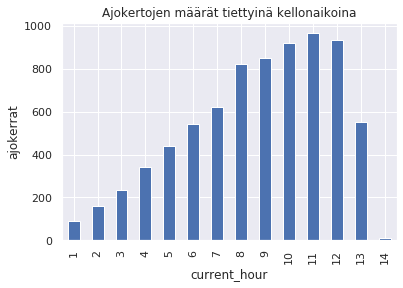

In [3]:
plot_h =df.groupby(["current_hour"])['ajokerta'].nunique()
plt.ylabel("ajokerrat")
plt.title("Ajokertojen määrät tiettyinä kellonaikoina")
plot_h.plot(kind = 'bar')

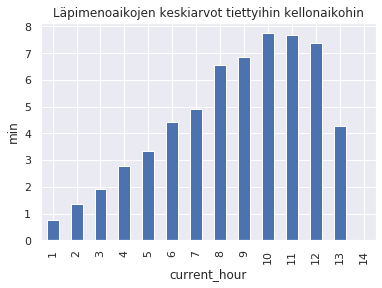

In [4]:
keskiarvot = (df.groupby (['current_hour'])["kesto"].count() / len(df['kesto'])) * 60 #Lasketaan keskiarvot aikaikkunoitten sisällä sekä muutetaan saadut luvut minuuteiksi
plot_df_keskiarvo = (keskiarvot)
plt.ylabel("min")
plt.title("Läpimenoaikojen keskiarvot tiettyihin kellonaikohin")
plot_df_keskiarvo.plot(kind = 'bar')
plt.show()

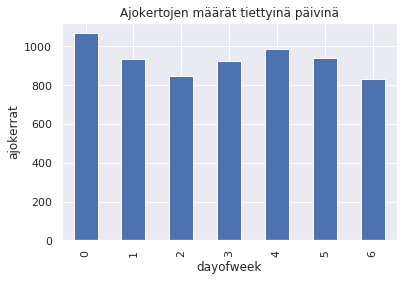

In [5]:
plot_pv =df.groupby(["dayofweek"])['ajokerta'].nunique()
plt.title("Ajokertojen määrät tiettyinä päivinä")
plt.ylabel("ajokerrat")

plot_pv.plot(kind = 'bar')

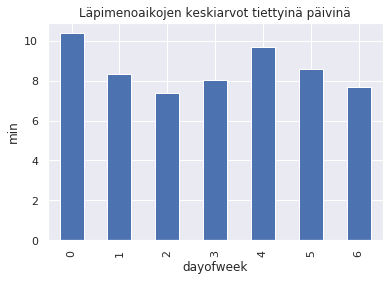

In [6]:
keskiarvot_pv = (df.groupby (['dayofweek'])['kesto'].count() / len(df['kesto'])) * 60
plot_df_keskiarvo_pv = (keskiarvot_pv)
plt.ylabel("min")
plt.title("Läpimenoaikojen keskiarvot tiettyinä päivinä")
plot_df_keskiarvo_pv.plot(kind = 'bar')
plt.show()